In [1]:
import numpy as np
import pandas as pd
import shutil, os
# Import matplotlib library
import matplotlib.pyplot as plt
import cv2
# Import scikit-learn library
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from time import time

In [67]:
'''df = pd.read_csv("D:/MSDS/3rd Sem/ML/Assignment/CelebA/CelebA/Anno/identity_CelebA.txt", sep='\s+', names=['image','id'])
df.to_csv('D:/MSDS/3rd Sem/ML/Assignment/identity_CelebA.csv')'''

In [2]:
def labels_file():

    file = open("D:/MSDS/3rd Sem/ML/Assignment/labels.txt") # file contains the identities or labels
    labels = []

    for i in file:
        labels.append(i)

    file.close()
    return labels


def celebA_file():
    file = open("D:/MSDS/3rd Sem/ML/Assignment/CelebA/CelebA/Anno/identity_CelebA.txt") # file contains image and label
    images_and_labels = []

    for i in file:
        images_and_labels.append(i)

    file.close()
    print(len(images_and_labels))
    return images_and_labels

def unique_label(labels):

    unique_labels_list = list(set(labels)) # list with only unique values
    #print(len(unique_labels_list))
    
    return unique_labels_list

def list_10_identities(images_and_labels, ten_labels):
    file = open("D:/MSDS/3rd Sem/ML/Assignment/CelebA/CelebA/10_identity_CelebA.txt", "w")
    images = []

    for i in ten_labels:

        for j in images_and_labels:

            i_and_l = j.split(" ")
            if i_and_l[1] == i:
                images.append(i_and_l[0] + " " + i_and_l[1])
                file.write(images[-1])

    file.close()
    return images


In [3]:
# reading files
labels = labels_file() 
unique_label = unique_label(labels)
uique_label = unique_label.sort()
ten_labels = unique_label[:10]
print(ten_labels)
images_and_labels = celebA_file() # read images and labels
image_labels = list_10_identities(images_and_labels, ten_labels) # extract images against 100 random unique identies


['1\n', '10\n', '100\n', '1000\n', '10000\n', '10001\n', '10002\n', '10003\n', '10004\n', '10005\n']
202599


In [4]:
print(len(image_labels))

242


In [5]:
df = pd.read_csv("D:/MSDS/3rd Sem/ML/Assignment/CelebA/CelebA/10_identity_CelebA.txt", sep='\s+', names=['image','id'])
df.head(3)

,image,id
0,000023.jpg,1
1,004506.jpg,1
2,006439.jpg,1


In [6]:
images= df.image.to_list()
labels= df['id']

In [7]:
data=[]
for i in images:
  img = cv2.imread('D:/MSDS/3rd Sem/ML/Assignment/CelebA/CelebA/Img/img_align_celeba/img_align_celeba/'+i,0)
  data.append(img)

imageData=np.array(data)
LabelData=np.array(labels)

In [8]:
imageData.shape

(242, 218, 178)

In [9]:
target = LabelData
print("unique target number:",np.unique(target))

unique target number: [    1    10   100  1000 10000 10001 10002 10003 10004 10005]


In [10]:
X = imageData.reshape((imageData.shape[0],imageData.shape[1]*imageData.shape[2]))
print("X shape:",X.shape)

X shape: (242, 38804)


In [11]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X, LabelData, test_size=0.2, random_state=42)

In [12]:
print(train_x[0])

[211 181 180 ...  61  61  66]


In [13]:
print("size of training Data is % d and Testing Data is % d" %(train_x.shape[0], test_x.shape[0]))

size of training Data is  193 and Testing Data is  49


In [14]:
print("train_x shape:",train_x.shape)
print("train_y shape:{}".format(train_y.shape))

train_x shape: (193, 38804)
train_y shape:(193,)


<AxesSubplot:title={'center':'Number of Samples for Each Classes'}, xlabel='Identities'>

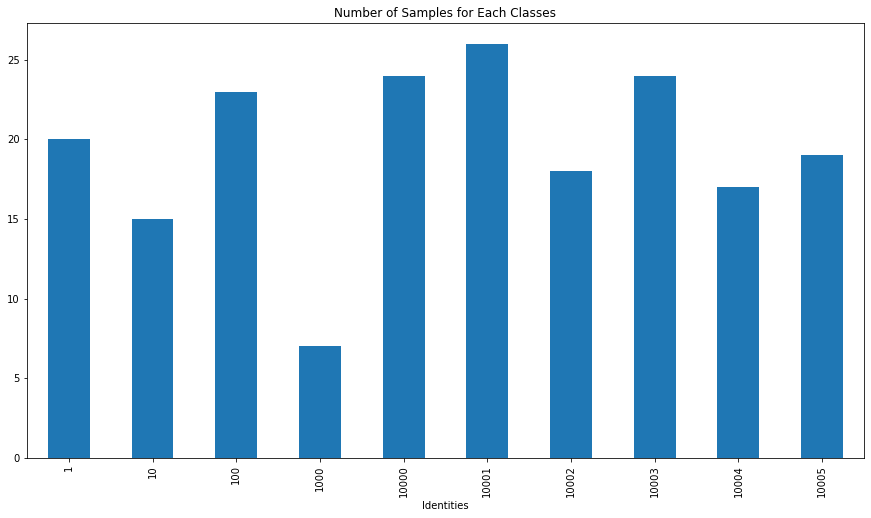

In [15]:
y_frame=pd.DataFrame()
y_frame['Identities']=train_y
y_frame.groupby(['Identities']).size().plot.bar(figsize=(15,8),title="Number of Samples for Each Classes")

In [16]:
from sklearn.decomposition import PCA
pca=PCA(n_components=10)
pca.fit(X)
X_pca=pca.transform(X)

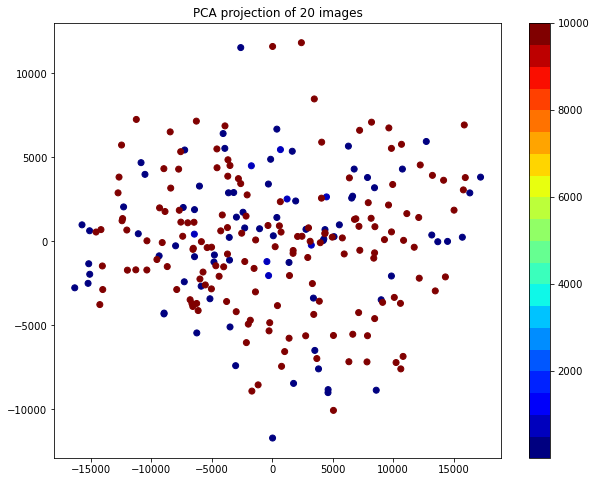

In [18]:
number_of_images=20
index_range=number_of_images*20
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(1,1,1)
scatter=ax.scatter(X_pca[:index_range,0],X_pca[:index_range,1], c=target[:index_range],cmap=plt.get_cmap('jet', number_of_images))

#ax.set_xlabel("First Principle Component")
#ax.set_ylabel("Second Principle Component")
ax.set_title("PCA projection of {} images".format(number_of_images))

fig.colorbar(scatter)

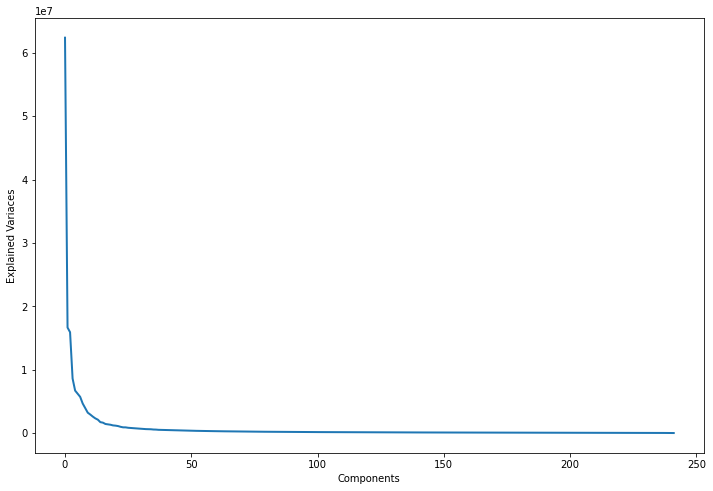

In [19]:
pca=PCA()
pca.fit(X)

plt.figure(1, figsize=(12,8))

plt.plot(pca.explained_variance_, linewidth=2)
 
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

In [21]:
n_components = 50
 
t0 = time()
pca=PCA(n_components=n_components, whiten=True)
pca.fit(train_x)
print("done in % 0.3fs" % (time() - t0))
 

done in  1.913s


Text(0.5, 1.0, 'Average Face')

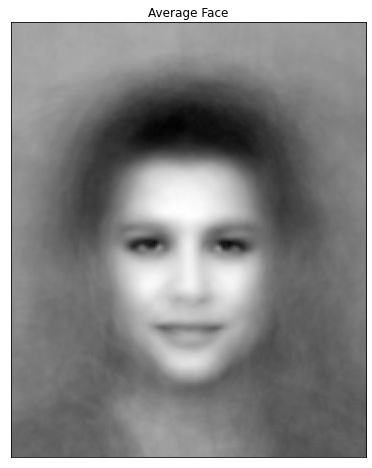

In [22]:
fig,ax=plt.subplots(1,1,figsize=(8,8))
ax.imshow(pca.mean_.reshape((218,178)), cmap="gray")
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Average Face')

In [23]:
print(len(pca.components_))

50


Text(0.5, 0.98, 'All Eigen Faces')

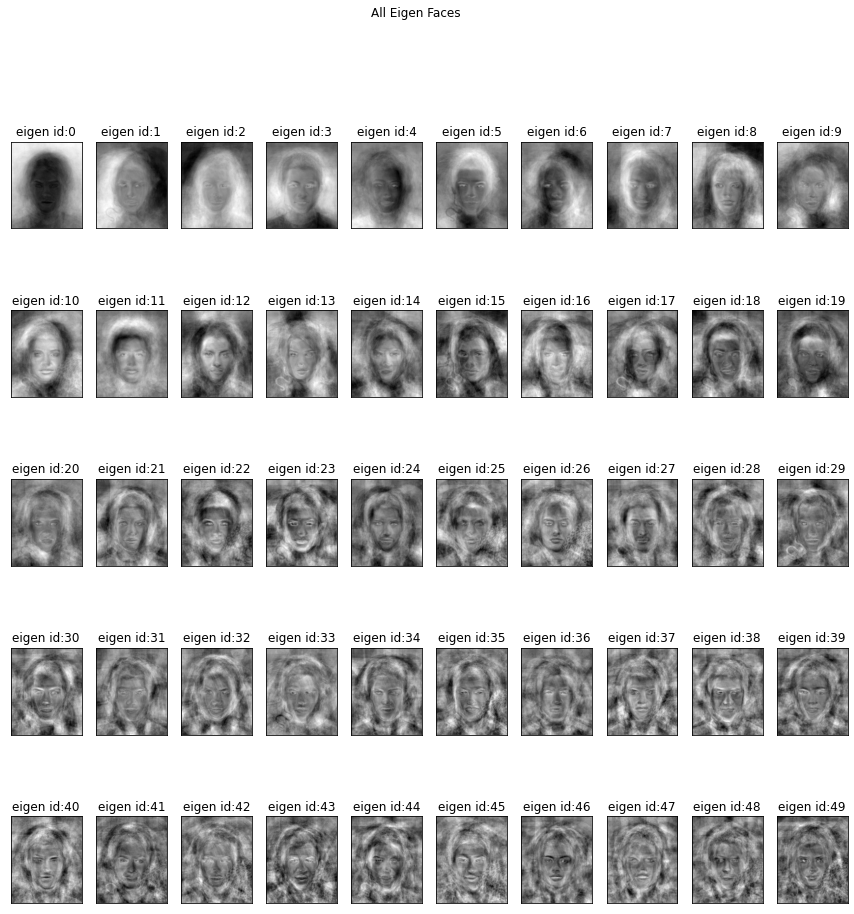

In [25]:
number_of_eigenfaces=len(pca.components_)

eigen_faces=pca.components_.reshape((number_of_eigenfaces, imageData.shape[1], imageData.shape[2]))

cols=10
rows=int(number_of_eigenfaces/cols)
fig, axarr=plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
axarr=axarr.flatten()

for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_title("eigen id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))


In [28]:
t0 = time()
X_train_pca = pca.transform(train_x)
X_test_pca = pca.transform(test_x)
print("done in % 0.3fs" % (time() - t0))

done in  0.203s


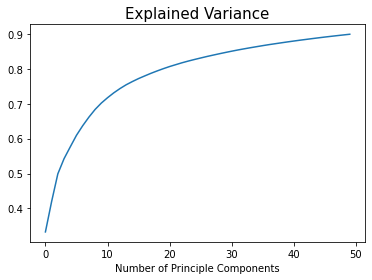

In [29]:
plt.plot(range(0,50), pca.explained_variance_ratio_.cumsum())
plt.title('Explained Variance',fontsize=15)
plt.xlabel('Number of Principle Components', fontsize=10)
plt.show()

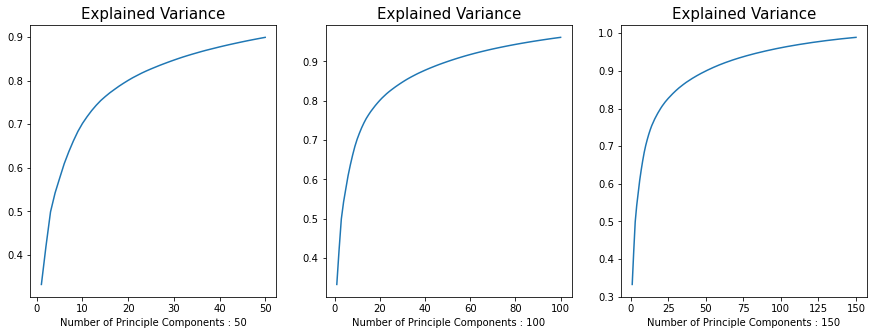

In [30]:
# create a function to plot line graph to compare ratio - Explained Variance changes with different n component
def EV(n):
    pca = PCA(n_components=n, whiten=True)
    X_train = pca.fit_transform(train_x)
    X_test = pca.transform(test_x)
    #plot
    plt.plot(range(1,n+1), pca.explained_variance_ratio_.cumsum())
    plt.title('Explained Variance',fontsize=15)
    plt.xlabel('Number of Principle Components : {}'.format(n), fontsize=10)
# use the function above and try use n_component=100,200,and 300
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
EV(50)
plt.subplot(1,3,2)
EV(100)
plt.subplot(1,3,3)
EV(150)

In [40]:
pca = PCA(n_components=150, whiten=True)
X_train = pca.fit_transform(train_x)
X_test = pca.transform(test_x)

In [53]:
clf = svm.SVC(C=1000, gamma=0.01)
%timeit clf.fit(X_train, train_y)
# obtian the accuracy
accuracy_train= clf.score(X_train, train_y)
accuracy_test= clf.score(X_test, test_y)
print('Accuracy - train data: {}'.format(accuracy_train))
print('Accuracy - test data : {}'.format( accuracy_test))
# prediction
test_pre=clf.predict(X_test)
train_pre=clf.predict(X_train)
# F1 _score
from sklearn.metrics import f1_score
f1_train=f1_score(train_y,train_pre,average='weighted')
f1_test=f1_score(test_y,test_pre,average='weighted')
print("f1 score - test data  : {}" .format(f1_test))


15.9 ms ± 275 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Accuracy - train data: 1.0
Accuracy - test data : 0.42857142857142855
f1 score - test data  : 0.4046609119838412


In [49]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, train_y)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.01)


In [50]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_pca)

Predicting the people names on the testing set


In [51]:
print(classification_report(test_y, y_pred, np.unique(target)))

              precision    recall  f1-score   support

           1       0.50      0.56      0.53         9
          10       0.50      0.75      0.60         4
         100       0.67      0.40      0.50         5
        1000       0.00      0.00      0.00         1
       10000       0.50      0.67      0.57         6
       10001       0.67      0.50      0.57         4
       10002       0.50      0.60      0.55         5
       10003       0.00      0.00      0.00         6
       10004       0.00      0.00      0.00         4
       10005       1.00      0.60      0.75         5

    accuracy                           0.45        49
   macro avg       0.43      0.41      0.41        49
weighted avg       0.47      0.45      0.45        49



D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=[    1    10   100  1000 10000 10001 10002 10003 10004 10005] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py

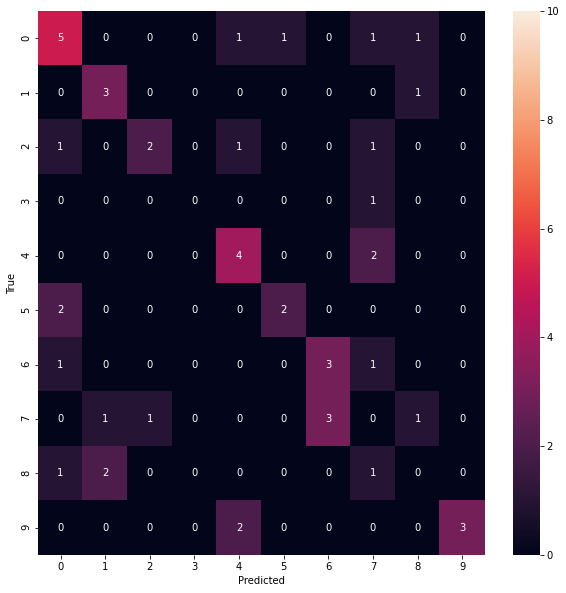

In [46]:
import seaborn as sns
plt.figure(figsize=(10,10))
ax = sns.heatmap(confusion_matrix(test_y, y_pred, labels=np.unique(target)), annot=True, vmax=10)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.show()

In [55]:
def title(y_pred, y_test, i):
    pred_label = y_pred[i]
    true_label = y_test[i]
    return 'predicted: %s\ntrue:      %s' % (pred_label, true_label)
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

In [56]:
print(y_pred[30])

10000


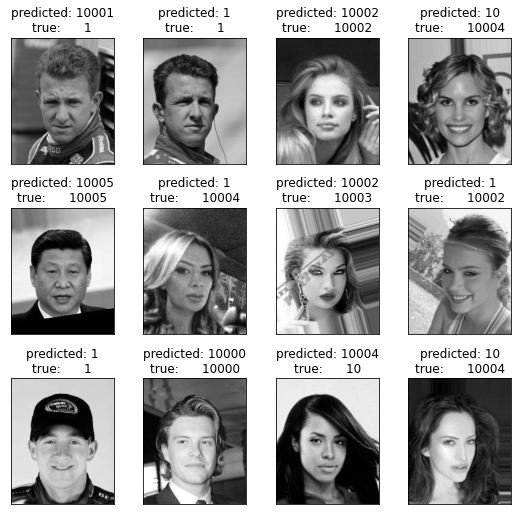

In [58]:
prediction_titles = [title(y_pred, test_y, i)
                         for i in range(y_pred.shape[0])]
plot_gallery(test_x, prediction_titles, imageData.shape[1], imageData.shape[2])